 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Load-in-stan-results" data-toc-modified-id="Load-in-stan-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load in stan results</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Load-in-cibersort-and-ground-truth" data-toc-modified-id="Load-in-cibersort-and-ground-truth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load in cibersort and ground truth</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Convergence-checks." data-toc-modified-id="Convergence-checks.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convergence checks.</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#get-the-full-deconvolution-distributions" data-toc-modified-id="get-the-full-deconvolution-distributions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>get the full deconvolution distributions</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Plot" data-toc-modified-id="Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Traceplots-and-correlation-matrix" data-toc-modified-id="Traceplots-and-correlation-matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Traceplots and correlation matrix</a></span><ul class="toc-item"><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#The-plot-above:-this-is-a-nice-diagnosis-of-what-is-going-on-here" data-toc-modified-id="The-plot-above:-this-is-a-nice-diagnosis-of-what-is-going-on-here-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The plot above: this is a nice diagnosis of what is going on here</a></span></li></ul></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.1%20informative%20priors%20--%20analysis.ipynb#Cibersort's-diagnostics" data-toc-modified-id="Cibersort's-diagnostics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cibersort's diagnostics</a></span></li></ul></div>

In [1]:
PLOT_DIR = 'plots/2.2.1/'

In [2]:
import numpy as np
import matplotlib as mpl
import data
import models
import cache
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pystan
from time import time
from datetime import timedelta
import pickle
import dill

INFO:stancache.seed:Setting seed to 1245502385
INFO:root:Setting CACHE_DIR = /home/jovyan/modelcache/mz
INFO:stancache.seed:Setting seed to 1245502385


In [3]:
# verify kernel won't crash due to MKL issue from future imports
import sklearn.linear_model.tests.test_randomized_l1

# Load in stan results

This time, pystan didn't error out, so we do have the `stanfit` object pickled out.

But to maintain a consistent pipeline, let's still use cmdstan:

In [27]:
# remove the file first, because otherwise it appends

!rm logs/stansummary.informativepriors.csv;

!stansummary --csv_file=logs/stansummary.informativepriors.csv \
logs/informativepriors_sampling_log.txt_0.csv \
logs/informativepriors_sampling_log.txt_1.csv \
logs/informativepriors_sampling_log.txt_2.csv \
logs/informativepriors_sampling_log.txt_3.csv > /dev/null;

In [28]:
stan_summary = pd.read_csv('logs/stansummary.informativepriors.csv', comment='#')
stan_summary.head()

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
0,lp__,-2.876380e+12,2.841990e+12,6.137380e+13,2.615930e+07,2.616710e+07,2.616950e+07,466.3590,0.003927,1.00530
1,accept_stat__,8.184530e-01,1.485240e-02,2.330780e-01,2.509770e-01,9.098770e-01,9.984200e-01,246.2680,0.002074,1.02152
2,stepsize__,1.209900e-02,4.258170e-03,3.261450e-01,7.416940e-04,2.560380e-03,1.003770e-02,5866.4600,0.049404,1.00007
3,treedepth__,9.551750e+00,1.679520e-01,1.648910e+00,8.000000e+00,1.000000e+01,1.000000e+01,96.3879,0.000812,1.03790
4,n_leapfrog__,9.331680e+02,3.489460e+01,2.552110e+02,2.550000e+02,1.023000e+03,1.023000e+03,53.4909,0.000450,1.06417


In [29]:
stan_data = pickle.load(open('2.2_informative_priors_standata.pkl', 'rb'))

In [30]:
colnames = stan_data['x2'].columns
colnames

Index(['SubSet[B_CD5]', 'SubSet[B_Memory]', 'SubSet[B_Naive]',
       'SubSet[CD4_Central_Memory]', 'SubSet[CD4_Effector_Memory]',
       'SubSet[CD4_Naive]', 'SubSet[CD4_Th1]', 'SubSet[CD4_Th17]',
       'SubSet[CD4_Th2]', 'SubSet[CD4_Treg]', 'SubSet[CD8_Central_Memory]',
       'SubSet[CD8_Effector]', 'SubSet[CD8_Naive]'],
      dtype='object')

In [31]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
28152,"sample2_x[1,1]",0.175636,0.208621,0.300334,0.000068,0.002337,0.743563,2.07250,0.000017,5.16412
28153,"sample2_x[1,2]",0.174361,0.206273,0.296912,0.000151,0.003208,0.742468,2.07191,0.000017,5.16937
28154,"sample2_x[1,3]",0.305635,0.167931,0.249283,0.001205,0.276970,0.745890,2.20354,0.000019,3.28164
28155,"sample2_x[1,4]",0.008922,0.002682,0.030848,0.000168,0.002391,0.023429,132.25300,0.001114,1.01847
28156,"sample2_x[1,5]",0.004196,0.001807,0.008912,0.000131,0.001850,0.013018,24.31700,0.000205,1.04857
28157,"sample2_x[1,6]",0.070833,0.082635,0.124704,0.000083,0.001202,0.340277,2.27736,0.000019,2.74338
28158,"sample2_x[1,7]",0.062179,0.071472,0.105670,0.000169,0.003058,0.287507,2.18588,0.000018,3.49924
28159,"sample2_x[1,8]",0.181167,0.215978,0.309817,0.000138,0.002626,0.770154,2.05775,0.000017,6.09931
28160,"sample2_x[1,9]",0.004485,0.001754,0.016446,0.000105,0.001553,0.010227,87.96940,0.000741,1.03060
28161,"sample2_x[1,10]",0.002660,0.000518,0.005916,0.000093,0.001289,0.008883,130.58200,0.001100,1.01864


# Load in cibersort and ground truth

In [78]:
[
    _, #merged_samples,
    cleaner_gt,
    friendly_mixture_descriptions,
    example_result,
    cib_class_names,
    rollup_groundtruth,
    rollupsums_df,
    col_order,
    rollups
] = pickle.load(open('/modelcache/experiments/tmp_2.1.1_plotting.pkl', 'rb'))

In [33]:
sns.set_style('darkgrid')

# Convergence checks.

In [34]:
!echo mkdir -p $PLOT_DIR
!mkdir -p $PLOT_DIR

mkdir -p plots/2.2.1/


In [35]:
def savefig(fig, *args, **kwargs):
    """
    Wrap figure.savefig defaulting to tight bounding box.
    From https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/axisgrid.py#L1840
    """
    kwargs.setdefault("bbox_inches", "tight")
    fig.savefig(*args, **kwargs)

In [36]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat']

28152    5.16412
28153    5.16937
28154    3.28164
28155    1.01847
28156    1.04857
28157    2.74338
28158    3.49924
28159    6.09931
28160    1.03060
28161    1.01864
28162    1.02345
28163    1.02172
28164    1.02775
28165    5.85710
28166    5.91891
28167    5.74551
28168    1.02457
28169    1.01383
28170    1.10588
28171    1.02000
28172    6.98553
28173    1.02454
28174    1.01465
28175    1.02645
28176    1.01805
28177    1.01751
28178    5.70162
28179    6.21399
28180    4.32103
28181    1.02663
          ...   
28252    1.18133
28253    1.11444
28254    1.44743
28255    1.06365
28256    4.00926
28257    1.93731
28258    2.44952
28259    1.01908
28260    1.09406
28261    2.27666
28262    1.03122
28263    1.91931
28264    1.06563
28265    1.12949
28266    1.09033
28267    1.45247
28268    1.07578
28269    4.80738
28270    1.05146
28271    1.03525
28272    1.05792
28273    1.18589
28274    2.81845
28275    1.07137
28276    1.16041
28277    1.08191
28278    1.15961
28279    1.145

In [40]:
# if this isn't true, stansummary failed (perhaps we ran it twice and appended)
assert stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'].dtype == 'float64'

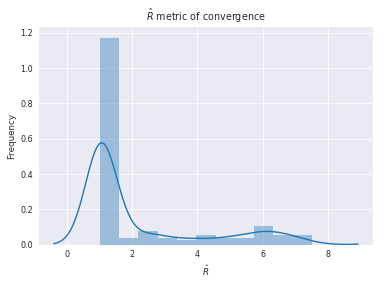

In [43]:
# convergence rhats


with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'])
    #plt.title('Unknown mixture fraction estimates -- Rhat distribution')
    plt.title('$\hat{R}$ metric of convergence')
    plt.ylabel('Frequency')
    plt.xlabel('$\hat{R}$')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'Rhat_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'Rhat_sample2-x_dist.png', dpi=300)

In [44]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'].astype(float).describe()

count    130.000000
mean       2.176613
std        1.930934
min        1.013510
25%        1.021763
50%        1.068500
75%        2.606720
max        7.509440
Name: R_hat, dtype: float64

median 17.06695
mean 68.9536762308
min 2.03535


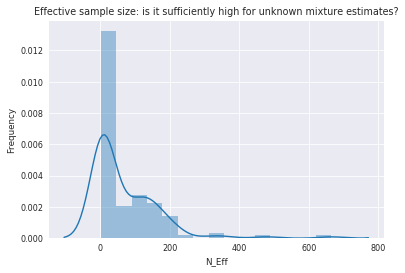

In [46]:
# convergence - N_eff

with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4)) # 8,6
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'])
    # Unknown mixture fraction estimates: effective sample size distribution
    plt.title('Effective sample size: is it sufficiently high for unknown mixture estimates?')

    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].mean())
    print('min', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].min())

    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'Neff_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'Neff_sample2-x_dist.png', dpi=300)

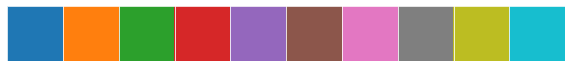

In [47]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

median 0.010509600000000001
mean 0.0640776454538


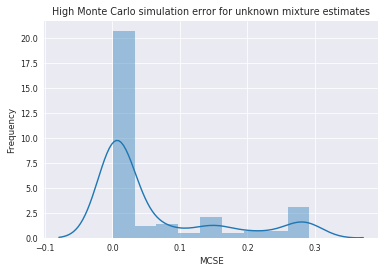

In [49]:
# convergence -- MCSE 
with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'],
                 #kde_kws={'color':sns.color_palette()[2]}
                )
    #plt.axvline(x=stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].median(),
    #            linestyle='dotted', lw=2.5, color=sns.color_palette()[2])
    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].mean())
    #plt.title('Unknown mixture fraction estimates: Monte Carlo error distribution')
    plt.title('High Monte Carlo simulation error for unknown mixture estimates')
    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'MCSE_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'MCSE_sample2-x_dist.png', dpi=300)

median 0.05399895
mean 0.108150797846


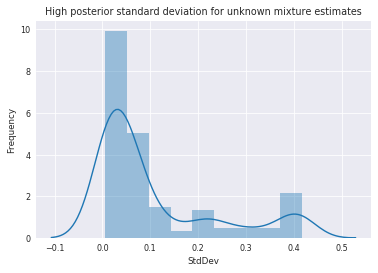

In [51]:
# convergence -- standard deviation
with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'])
    # plt.axvline(x=stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].median(),
    #             linestyle='dotted', lw=2.5, color=sns.color_palette()[2])
    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].mean())
    plt.title('High posterior standard deviation for unknown mixture estimates')
    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'StdDev_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'StdDev_sample2-x_dist.png', dpi=300)

In [52]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].describe()

count    130.000000
mean       0.108151
std        0.130556
min        0.004982
25%        0.013624
50%        0.053999
75%        0.139249
max        0.417242
Name: StdDev, dtype: float64

# get the full deconvolution distributions

In [53]:
# have to load in the full traces
cols_we_want = stan_summary[stan_summary.name.str.startswith('sample2_x')].name.values
cols_we_want

array(['sample2_x[1,1]', 'sample2_x[1,2]', 'sample2_x[1,3]',
       'sample2_x[1,4]', 'sample2_x[1,5]', 'sample2_x[1,6]',
       'sample2_x[1,7]', 'sample2_x[1,8]', 'sample2_x[1,9]',
       'sample2_x[1,10]', 'sample2_x[1,11]', 'sample2_x[1,12]',
       'sample2_x[1,13]', 'sample2_x[2,1]', 'sample2_x[2,2]',
       'sample2_x[2,3]', 'sample2_x[2,4]', 'sample2_x[2,5]',
       'sample2_x[2,6]', 'sample2_x[2,7]', 'sample2_x[2,8]',
       'sample2_x[2,9]', 'sample2_x[2,10]', 'sample2_x[2,11]',
       'sample2_x[2,12]', 'sample2_x[2,13]', 'sample2_x[3,1]',
       'sample2_x[3,2]', 'sample2_x[3,3]', 'sample2_x[3,4]',
       'sample2_x[3,5]', 'sample2_x[3,6]', 'sample2_x[3,7]',
       'sample2_x[3,8]', 'sample2_x[3,9]', 'sample2_x[3,10]',
       'sample2_x[3,11]', 'sample2_x[3,12]', 'sample2_x[3,13]',
       'sample2_x[4,1]', 'sample2_x[4,2]', 'sample2_x[4,3]',
       'sample2_x[4,4]', 'sample2_x[4,5]', 'sample2_x[4,6]',
       'sample2_x[4,7]', 'sample2_x[4,8]', 'sample2_x[4,9]',
       'samp

In [54]:
cols_we_want_renamed  = [c.replace('[', '.').replace(']', '').replace(',', '.') for c in cols_we_want]
cols_we_want_renamed

['sample2_x.1.1',
 'sample2_x.1.2',
 'sample2_x.1.3',
 'sample2_x.1.4',
 'sample2_x.1.5',
 'sample2_x.1.6',
 'sample2_x.1.7',
 'sample2_x.1.8',
 'sample2_x.1.9',
 'sample2_x.1.10',
 'sample2_x.1.11',
 'sample2_x.1.12',
 'sample2_x.1.13',
 'sample2_x.2.1',
 'sample2_x.2.2',
 'sample2_x.2.3',
 'sample2_x.2.4',
 'sample2_x.2.5',
 'sample2_x.2.6',
 'sample2_x.2.7',
 'sample2_x.2.8',
 'sample2_x.2.9',
 'sample2_x.2.10',
 'sample2_x.2.11',
 'sample2_x.2.12',
 'sample2_x.2.13',
 'sample2_x.3.1',
 'sample2_x.3.2',
 'sample2_x.3.3',
 'sample2_x.3.4',
 'sample2_x.3.5',
 'sample2_x.3.6',
 'sample2_x.3.7',
 'sample2_x.3.8',
 'sample2_x.3.9',
 'sample2_x.3.10',
 'sample2_x.3.11',
 'sample2_x.3.12',
 'sample2_x.3.13',
 'sample2_x.4.1',
 'sample2_x.4.2',
 'sample2_x.4.3',
 'sample2_x.4.4',
 'sample2_x.4.5',
 'sample2_x.4.6',
 'sample2_x.4.7',
 'sample2_x.4.8',
 'sample2_x.4.9',
 'sample2_x.4.10',
 'sample2_x.4.11',
 'sample2_x.4.12',
 'sample2_x.4.13',
 'sample2_x.5.1',
 'sample2_x.5.2',
 'sample2_x.

In [55]:
all_traces = []
for i in range(4):
    print('loading:', i)
    trace_i = pd.read_csv('logs/informativepriors_sampling_log.txt_%d.csv' % i, comment='#', usecols=cols_we_want_renamed)
    trace_i['trace_id'] = i
    trace_i['iter'] = trace_i.index
    all_traces.append(trace_i)

loading: 0
loading: 1
loading: 2
loading: 3


In [56]:
all_traces_df = pd.concat(all_traces)
print(all_traces_df.shape)
all_traces_df.head()

(8000, 132)


,sample2_x.1.1,sample2_x.2.1,sample2_x.3.1,sample2_x.4.1,sample2_x.5.1,sample2_x.6.1,sample2_x.7.1,sample2_x.8.1,sample2_x.9.1,sample2_x.10.1,...,sample2_x.3.13,sample2_x.4.13,sample2_x.5.13,sample2_x.6.13,sample2_x.7.13,sample2_x.8.13,sample2_x.9.13,sample2_x.10.13,trace_id,iter
0,0.023568,0.019506,0.273356,0.017382,0.282248,0.114136,0.176982,0.017869,0.230396,0.174504,...,0.01824,0.006905,0.037897,0.02052,0.011482,0.005919,0.002919,0.024678,0,0
1,0.023568,0.019506,0.273356,0.017382,0.282248,0.114136,0.176982,0.017869,0.230396,0.174504,...,0.01824,0.006905,0.037897,0.02052,0.011482,0.005919,0.002919,0.024678,0,1
2,0.023568,0.019506,0.273356,0.017382,0.282248,0.114136,0.176982,0.017869,0.230396,0.174504,...,0.01824,0.006905,0.037897,0.02052,0.011482,0.005919,0.002919,0.024678,0,2
3,0.023568,0.019506,0.273356,0.017382,0.282248,0.114136,0.176982,0.017869,0.230396,0.174504,...,0.01824,0.006905,0.037897,0.02052,0.011482,0.005919,0.002919,0.024678,0,3
4,0.023568,0.019506,0.273356,0.017382,0.282248,0.114136,0.176982,0.017869,0.230396,0.174504,...,0.01824,0.006905,0.037897,0.02052,0.011482,0.005919,0.002919,0.024678,0,4


In [57]:
all_traces_df2 = pd.melt(all_traces_df, id_vars=['iter','trace_id'], value_name='estimate', var_name='variable')
all_traces_df2.head()

,iter,trace_id,variable,estimate
0,0,0,sample2_x.1.1,0.023568
1,1,0,sample2_x.1.1,0.023568
2,2,0,sample2_x.1.1,0.023568
3,3,0,sample2_x.1.1,0.023568
4,4,0,sample2_x.1.1,0.023568


In [58]:
var_ids = all_traces_df2.variable.str.extract('sample2_x.(?P<sample_id>\d+).(?P<subset_id>\d+)')
var_ids.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,sample_id,subset_id
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [59]:
all_traces_df3= pd.concat([all_traces_df2, var_ids], axis=1) 
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id
0,0,0,sample2_x.1.1,0.023568,1,1
1,1,0,sample2_x.1.1,0.023568,1,1
2,2,0,sample2_x.1.1,0.023568,1,1
3,3,0,sample2_x.1.1,0.023568,1,1
4,4,0,sample2_x.1.1,0.023568,1,1


In [60]:
all_traces_df3['subset_id'] = all_traces_df3['subset_id'].astype(int)
all_traces_df3['sample_id'] = all_traces_df3['sample_id'].astype(int)

In [61]:
sample2_xs = stan_summary[stan_summary.name.str.startswith('sample2_x')]['Mean'].values.reshape(10, 13)
sample2_xs.shape

mixture_estimates = pd.DataFrame(sample2_xs, columns=colnames)
mixture_estimates

import re
subset_names = [re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2') for x in mixture_estimates.columns]
subset_names

['B_CD5',
 'B_Memory',
 'B_Naive',
 'CD4_Central_Memory',
 'CD4_Effector_Memory',
 'CD4_Naive',
 'CD4_Th1',
 'CD4_Th17',
 'CD4_Th2',
 'CD4_Treg',
 'CD8_Central_Memory',
 'CD8_Effector',
 'CD8_Naive']

In [62]:
all_traces_df3['subset_name'] = all_traces_df3.subset_id.apply(lambda i: subset_names[i-1])
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name
0,0,0,sample2_x.1.1,0.023568,1,1,B_CD5
1,1,0,sample2_x.1.1,0.023568,1,1,B_CD5
2,2,0,sample2_x.1.1,0.023568,1,1,B_CD5
3,3,0,sample2_x.1.1,0.023568,1,1,B_CD5
4,4,0,sample2_x.1.1,0.023568,1,1,B_CD5


In [63]:
# IMPORTANT: drop the warmup samples!!!!!
warmup = 1000
# this should show a wide range
#all_traces_df3.iter.hist()
all_traces_df3.iter.describe()[['min', 'max']]

min       0.0
max    1999.0
Name: iter, dtype: float64

In [64]:
# drop warmups
all_traces_df3 = all_traces_df3.loc[all_traces_df3['iter']>=1000,]
all_traces_df3['iter'] -= 1000
# this should be better now
#all_traces_df3.iter.hist()
all_traces_df3.iter.describe()[['min', 'max']]

min      0.0
max    999.0
Name: iter, dtype: float64

In [65]:
# combine iteration numbers across traces -- i.e. line them up from 0 to 4000, not 4 versions of 0 to 1000
#(all_traces_df3['trace_id']*1000 + all_traces_df3['iter']).hist()
(all_traces_df3['trace_id']*1000 + all_traces_df3['iter']).describe()[['min', 'max']]

min       0.0
max    3999.0
dtype: float64

In [66]:
all_traces_df3['combined_iter_number'] = (all_traces_df3['trace_id']*1000 + all_traces_df3['iter'])

In [67]:
assert all_traces_df3.shape[0] / 10 / 13 / 4 == 1000.

# Plot

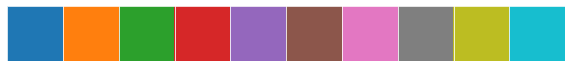

In [68]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [69]:
subset_names, cib_class_names

(['B_CD5',
  'B_Memory',
  'B_Naive',
  'CD4_Central_Memory',
  'CD4_Effector_Memory',
  'CD4_Naive',
  'CD4_Th1',
  'CD4_Th17',
  'CD4_Th2',
  'CD4_Treg',
  'CD8_Central_Memory',
  'CD8_Effector',
  'CD8_Naive'],
 ['B_CD5',
  'B_Memory',
  'B_Naive',
  'CD4_Central_Memory',
  'CD4_Effector_Memory',
  'CD4_Naive',
  'CD4_Th1',
  'CD4_Th17',
  'CD4_Th2',
  'CD4_Treg',
  'CD8_Central_Memory',
  'CD8_Effector',
  'CD8_Naive'])

In [ ]:
# # Roll up by cell type

rollups = {
    'B': subset_names[:3],
    'CD4 T': subset_names[3:10],
    'CD8 T': subset_names[10:]
}
rollups = {
    'B': [c for c in cib_class_names if c.startswith('B_')],
    'CD4 T': [c for c in cib_class_names if c.startswith('CD4_')],
    'CD8 T': [c for c in cib_class_names if c.startswith('CD8_')]
}
rollups

In [70]:
def label_rollup(rollups, x):
    for key in rollups.keys():
        if x in rollups[key]:
            return key
    return None

In [71]:
all_traces_df3['rollup'] = all_traces_df3.subset_name.apply(lambda x: label_rollup(rollups, x))

all_traces_df3.rollup.value_counts()

CD4 T    280000
B        120000
CD8 T    120000
Name: rollup, dtype: int64

In [72]:
samples_rolledup = all_traces_df3.groupby(['sample_id', 'combined_iter_number', 'rollup']).estimate.sum().reset_index()
samples_rolledup.head()

,sample_id,combined_iter_number,rollup,estimate
0,1,0,B,0.848373
1,1,0,CD4 T,0.148604
2,1,0,CD8 T,0.003023
3,1,1,B,0.853339
4,1,1,CD4 T,0.136432


In [73]:
# now roll up ground truth: sum the subset fractions for every sample into B, CD8 T, CD4 groups:

groundtruth_df = stan_data['x2'].copy()
groundtruth_df['mixID'] = range(len(groundtruth_df))
groundtruth_df

,SubSet[B_CD5],SubSet[B_Memory],SubSet[B_Naive],SubSet[CD4_Central_Memory],SubSet[CD4_Effector_Memory],SubSet[CD4_Naive],SubSet[CD4_Th1],SubSet[CD4_Th17],SubSet[CD4_Th2],SubSet[CD4_Treg],SubSet[CD8_Central_Memory],SubSet[CD8_Effector],SubSet[CD8_Naive],mixID
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,6
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,7
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,8
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,9


In [74]:
groundtruth_df_2 = pd.melt(groundtruth_df, id_vars=['mixID'], var_name='subset', value_name='estimate')
print(groundtruth_df_2.shape)
groundtruth_df_2['subset'] = groundtruth_df_2['subset'].apply(lambda x: re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2'))
groundtruth_df_2['rollup'] = groundtruth_df_2.subset.apply(lambda x: label_rollup(rollups, x))
groundtruth_df_2.head()

(130, 3)


,mixID,subset,estimate,rollup
0,0,B_CD5,0.0,B
1,1,B_CD5,0.0,B
2,2,B_CD5,0.0,B
3,3,B_CD5,0.0,B
4,4,B_CD5,0.0,B


In [75]:
rollup_groundtruth = groundtruth_df_2.groupby(['mixID', 'rollup']).estimate.sum().reset_index()
rollup_groundtruth.head()

,mixID,rollup,estimate
0,0,B,1.0
1,0,CD4 T,0.0
2,0,CD8 T,0.0
3,1,B,1.0
4,1,CD4 T,0.0


In [79]:
# cibersort results
rollupsums_df.head()

,B,CD4 T,CD8 T
0,0.733192,0.156393,0.110415
1,0.873172,0.104869,0.021959
2,0.742666,0.171586,0.085748
3,0.831617,0.139056,0.029327
4,0.756919,0.086678,0.156404


In [80]:
cleaner_traces = all_traces_df3.copy()
cleaner_traces['subset_name'] = cleaner_traces['subset_name'].str.replace(
    '_', ' ')
cleaner_traces['subset_name'].value_counts()

cleaner_gt = stan_data['x2'].rename(
    columns=
    lambda x: x.replace('_', ' ').replace('SubSet[', '').replace(']', ''))
cleaner_gt.columns

Index(['B CD5', 'B Memory', 'B Naive', 'CD4 Central Memory',
       'CD4 Effector Memory', 'CD4 Naive', 'CD4 Th1', 'CD4 Th17', 'CD4 Th2',
       'CD4 Treg', 'CD8 Central Memory', 'CD8 Effector', 'CD8 Naive'],
      dtype='object')

In [81]:
cleaner_traces.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,combined_iter_number,rollup
1000,0,0,sample2_x.1.1,0.000869,1,1,B CD5,0,B
1001,1,0,sample2_x.1.1,0.000923,1,1,B CD5,1,B
1002,2,0,sample2_x.1.1,0.000842,1,1,B CD5,2,B
1003,3,0,sample2_x.1.1,0.000522,1,1,B CD5,3,B
1004,4,0,sample2_x.1.1,0.002383,1,1,B CD5,4,B


In [82]:
samples_rolledup.head()

,sample_id,combined_iter_number,rollup,estimate
0,1,0,B,0.848373
1,1,0,CD4 T,0.148604
2,1,0,CD8 T,0.003023
3,1,1,B,0.853339
4,1,1,CD4 T,0.136432


In [83]:
merged_samples_1 = cleaner_traces[['sample_id', 'combined_iter_number', 'subset_name', 'estimate']].copy()
merged_samples_1['type'] = 'subset'
merged_samples_2 = samples_rolledup.copy()
merged_samples_2.columns = [c.replace('rollup', 'subset_name') for c in merged_samples_2.columns]
merged_samples_2['type'] = 'rollup'
merged_samples = pd.concat([merged_samples_1, merged_samples_2])
merged_samples.type.value_counts()

subset    520000
rollup    120000
Name: type, dtype: int64

In [84]:
#sns.set_context('paper')
sns.set_style("darkgrid")

In [85]:
def extract_values_for_mixture_by_id(key):
    """
    key: 1-indexed, meaning mixture 1 to mixture 10
    
    based on:
    for (key, grp), \
            (_, groundtruth_base), \
            friendly_title, \
            (_, cib_vals_base), \
            (mixID_rolledup, groundtruth_rolledup), \
            (_, cib_vals_rolledup) in zip(merged_samples.groupby('sample_id'),
                                          cleaner_gt.iterrows(),
                                          #friendly_mixture_descriptions2,
                                          friendly_mixture_descriptions,
                                          example_result[cib_class_names].iterrows(),
                                          rollup_groundtruth.groupby('mixID'),
                                          rollupsums_df.iterrows()
    """
    grp = merged_samples[merged_samples['sample_id'] == key]
    groundtruth_base = cleaner_gt.iloc[key-1]
    cib_vals_base = example_result[cib_class_names].iloc[key-1]
    groundtruth_rolledup = rollup_groundtruth[rollup_groundtruth['mixID'] == key-1]
    cib_vals_rolledup = rollupsums_df.iloc[key-1]
    
    return (key, grp, groundtruth_base, cib_vals_base, groundtruth_rolledup, cib_vals_rolledup)

In [86]:
def plot_single_mixture_results(mixture_info, friendly_title):
    #flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # http://seaborn.pydata.org/tutorial/color_palettes.html
    #sns.palplot(flatui)
    paired_colors = sns.color_palette("Paired_r", 12)
    #sns.palplot(paired_colors)
    
    (key, grp, groundtruth_base, cib_vals_base, groundtruth_rolledup, cib_vals_rolledup) = mixture_info

    with sns.plotting_context('paper'):
        f, ax = plt.subplots( figsize=(12,8))
        g = sns.boxplot(data = grp,
                       y='subset_name',
                       x='estimate',
                       ax=ax,
                       hue='type',
                       order=col_order,
                        # some additional parameters that we think may help:
                        saturation=1,
                        linewidth=1, # not sure about this one
                        dodge=False, # avoid hue nesting
                       #palette=[flatui[0], flatui[1]]
                        palette=paired_colors[0:2]
                       )
        g.set_title(friendly_title) 

        # ground truth
        gt1 = pd.DataFrame(groundtruth_base).reset_index()
        gt1.columns = ['rollup', 'estimate']
        gt1['type'] = 'subset'
        gt2 = groundtruth_rolledup[['rollup', 'estimate']].copy()
        gt2['type'] = 'rollup'
        gt = pd.concat([gt1, gt2])

        sns.stripplot(
            x="estimate",
            y="rollup",
            data=gt,
            hue='type',
            order=col_order,
            linewidth=0,
            size=15,
            alpha=.9,
            marker=(5, 1),
            #palette=[flatui[5], flatui[3]],
            palette=paired_colors[2:4],
            zorder=5,
            jitter=False,
            label='Ground Truth' # https://github.com/mwaskom/seaborn/issues/940 -- without this line, the stars aren't shown in legend entries made by "hue" param; instead you get a ton of dupe Ground Truth star labels
        )

        # add cibersort points
        cb_base = pd.DataFrame(cib_vals_base).reset_index()
        cb_base.columns = ['SubSet', 'estimate']
        cb_base['type'] = 'subset'

        cb_rolledup = pd.DataFrame(cib_vals_rolledup).reset_index()
        cb_rolledup.columns = ['SubSet', 'estimate']
        cb_rolledup['type'] = 'rollup'

        cb = pd.concat([cb_base, cb_rolledup])
        cb.SubSet = cb.SubSet.str.replace('_', ' ') # normalize names

        sns.stripplot(
            x="estimate",
            y="SubSet",
            data=cb,
            hue='type',
            order=col_order,
            linewidth=0,
            size=15,
            alpha=.9,
            marker=(3, 0),
            #palette=[flatui[2], flatui[4]],
            palette=paired_colors[4:6],
            zorder=6,
            jitter=False,
            label='Cibersort' # see above again re this label parameter
        )

        g.set_xlabel('Mixture proportion')
        g.set_ylabel('Cell type')
        g.set_xbound(0, 1)

        # show legend, and subselect because stripplot adds one legend item per point it appears
        handles, labels = ax.get_legend_handles_labels()
        """
        want legend items:
        * infino samples: items 0, 1
        * ground truth stars: items 2, 3
        * cibersort triangles: items 2+len(col_order)+2, 2+len(col_order)+2+1
        """
        chosen_idx = [1,0, 2,3, 2+len(col_order)+2, 2+len(col_order)+2+1]
        chosen_handles = [handles[i] for i in chosen_idx]
        #chosen_labels = [labels[i] for i in chosen_idx]
        chosen_labels = ['Infino (sums)', 'Infino', 'Ground Truth (sums)', 'Ground Truth', 'Cibersort (sums)', 'Cibersort']
        legend = ax.legend(
            chosen_handles,
            chosen_labels,
            loc='lower right',
            frameon=True)
        frame = legend.get_frame()
        frame.set_edgecolor('red')
        frame.set_facecolor('white')

        # shade background
        #fill1 = plt.axhspan('B', 'CD4 T', facecolor='0.5', alpha=0.5)
        fill1 = plt.axhspan(-0.5, 3.5, facecolor='0.8', alpha=0.3)
        fill3 = plt.axhspan(11.5, 15.5, facecolor='0.8', alpha=0.3)

        # improve label format
        # https://stackoverflow.com/a/34426167/130164
        for label in ax.get_yticklabels():
            if label.get_text() in rollups.keys():
                label.set_size(15)
                label.set_backgroundcolor("yellow")
                label.set_weight("bold")
                label.set_color("red")
            else:
                label.set_fontstyle("italic")
                label.set_weight("bold")


        return f,ax
        

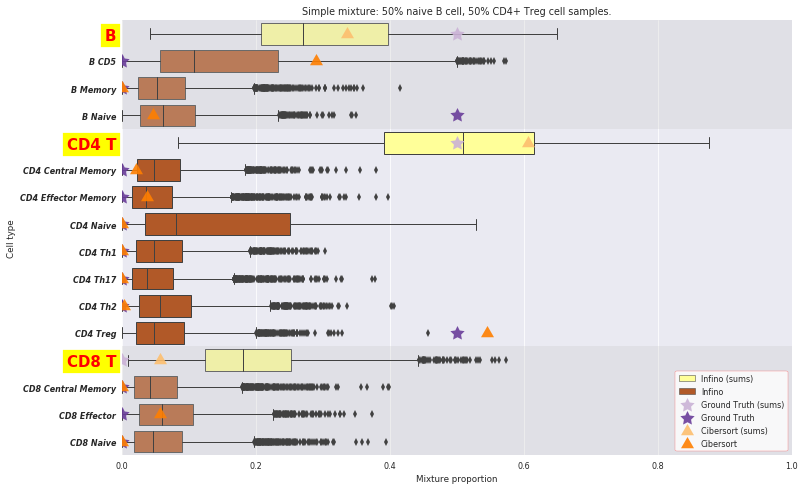

In [87]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(7),
                                   'Simple mixture: 50% naive B cell, 50% CD4+ Treg cell samples.')
savefig(f, PLOT_DIR+'fig1b.png', dpi=300)
savefig(f, PLOT_DIR+'fig1b.pdf', dpi=300)

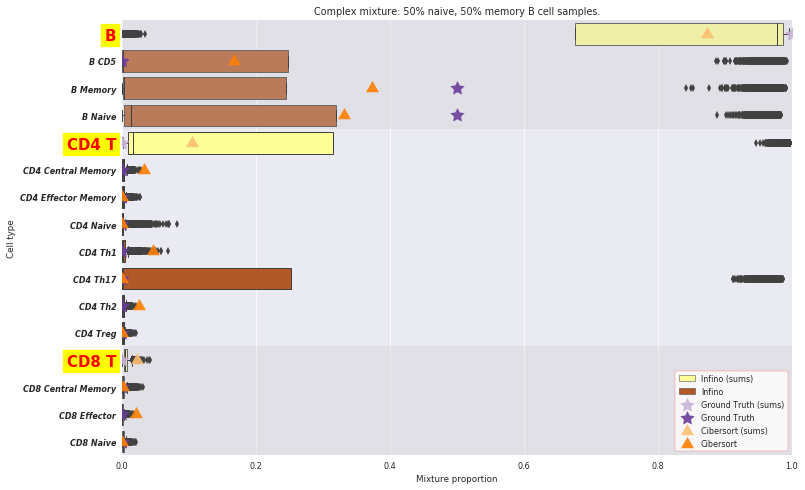

In [88]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(2),
                                   'Complex mixture: 50% naive, 50% memory B cell samples.')
savefig(f, PLOT_DIR+'fig1c.png', dpi=300)
savefig(f, PLOT_DIR+'fig1c.pdf', dpi=300)

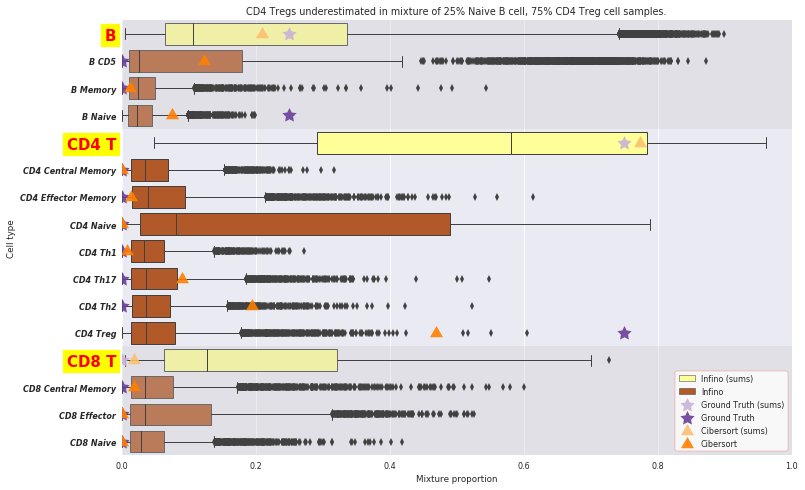

In [89]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(10),
                                   'CD4 Tregs underestimated in mixture of 25% Naive B cell, 75% CD4 Treg cell samples.')
savefig(f, PLOT_DIR+'fig1e.png', dpi=300)
savefig(f, PLOT_DIR+'fig1e.pdf', dpi=300)

# Traceplots and correlation matrix

In [90]:
# # traceplots

# see https://github.com/stan-dev/pystan/blob/develop/pystan/plots.py
# see https://github.com/stan-dev/pystan/blob/develop/pystan/stanfit4model.pyx#L487
# see https://pymc-devs.github.io/pymc3/notebooks/getting_started.html#Posterior-analysis
# see https://github.com/pymc-devs/pymc3/blob/master/pymc3/plots/traceplot.py
from pystan.external.pymc import plots
# actually this imports https://github.com/stan-dev/pystan/blob/develop/pystan/external/pymc/plots.py


all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,combined_iter_number,rollup
1000,0,0,sample2_x.1.1,0.000869,1,1,B_CD5,0,B
1001,1,0,sample2_x.1.1,0.000923,1,1,B_CD5,1,B
1002,2,0,sample2_x.1.1,0.000842,1,1,B_CD5,2,B
1003,3,0,sample2_x.1.1,0.000522,1,1,B_CD5,3,B
1004,4,0,sample2_x.1.1,0.002383,1,1,B_CD5,4,B


In the following traceplots, note that we ensure above that we don't use the index column as x axis, and instead use iter. that way the chains are combined.

(0, 1)

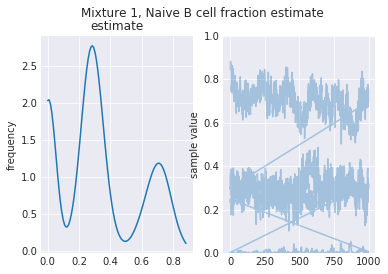

In [91]:
g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Naive')].set_index(
                       'iter')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Naive B cell fraction estimate')
g.gca().set_ylim(0, 1)

## The plot above: this is a nice diagnosis of what is going on here

Comment from Jacki:

> that’s a pretty clear indication that your posterior is multimodal

> this is common in mixture models where the groups are non-identifiable (ie if naive B & memory B cells are basically indistinguishable, then the model gets “stuck” in one vs the other)

(0, 1)

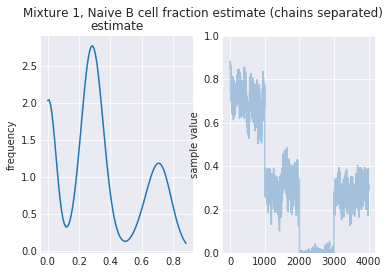

In [109]:
# break out by chain to demonstrate how chains aren't converging
# how: set_index() to combined_iter_number instead of iter

g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Naive')].set_index(
                       'combined_iter_number')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Naive B cell fraction estimate (chains separated)')
g.gca().set_ylim(0, 1)

I think we have reached the case that we once suspected we’d hit of chains not converging. Above is the same plot with the chains clearly separated.

What's an appropriate way to deal with this case? It seems straightforward to detect when posterior is multimodal. Should we warn user and then consider each chain individually rather than combining? i.e. output one analysis per chain?

Comments from Jacki:

> I think generally the recommendation is to (1) constrain the multi-modality by putting some informative priors on the model, or reparameterizing it — not sure that makes sense in our case, (2) combine data from all chains, and ideally run more chains to get better coverage. 
>
> The idea behind 2 is that each chain found a “mode”, any one of which is a plausible local maximum probability. because no chains move between modes, we can’t know their relative proportions in the full posterior, but you probably don’t want to pick one arbitrarily, either. it’s safer to assume in the absence of more information that they are each equally plausible.
>
> Mike betancourt has a nice write up on this — mainly applies to cases where the groups are unlabelled. but it could just as easily apply where they are indistinguishable (?)
>
> http://mc-stan.org/users/documentation/case-studies/identifying_mixture_models.html
>
> i will say, each chain seems to be sampling well within its range — which is good. truly pathological traceplots will be “stuck” ie you’ll see flat regions periodically

(<matplotlib.figure.Figure at 0x7efb870839b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efb8716aa20>)

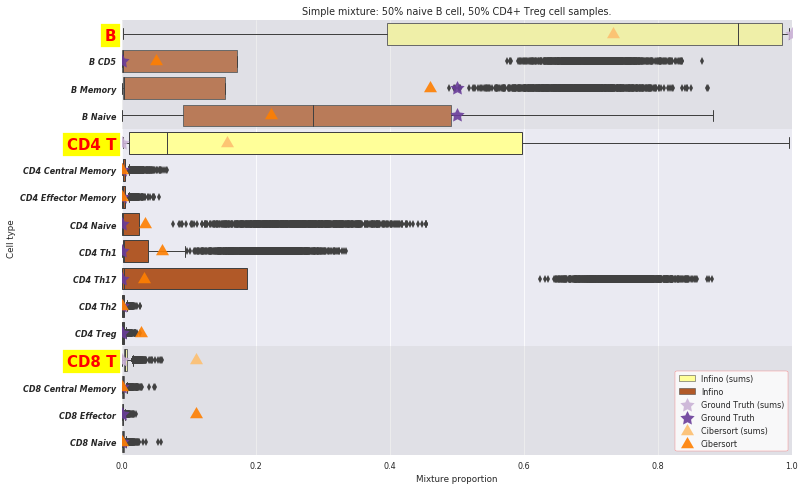

In [110]:
plot_single_mixture_results(extract_values_for_mixture_by_id(1),
                                   'Simple mixture: 50% naive B cell, 50% CD4+ Treg cell samples.')

^^ this shows that rollups don't fix it.

(0, 1)

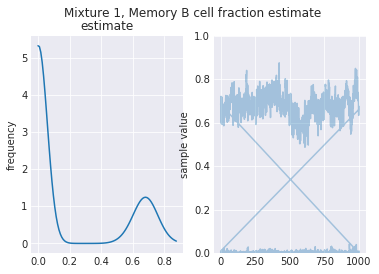

In [92]:
g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Memory')].set_index(
                       'iter')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Memory B cell fraction estimate')
g.gca().set_ylim(0, 1)

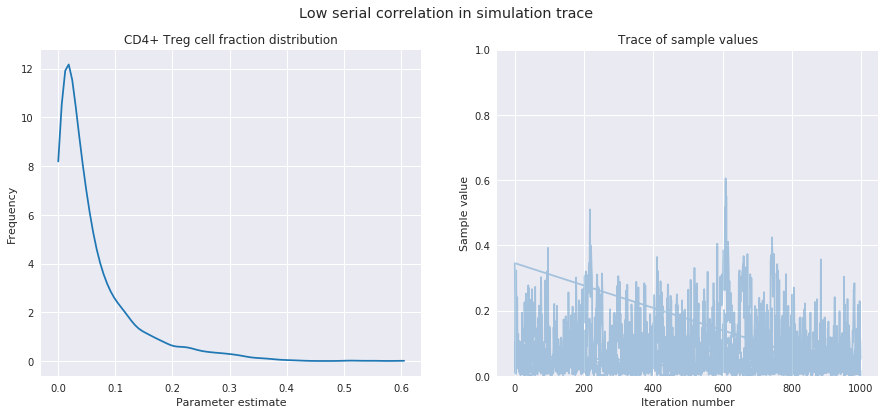

In [93]:
with sns.plotting_context('notebook'):
    g = plots.traceplot(all_traces_df3[(all_traces_df3['sample_id'] == 10) & (all_traces_df3['subset_name'] == 'CD4_Treg')]                        .set_index('iter')[['estimate']],
                        vars=['estimate'],
                       )
    g.set_size_inches((15,6))
    #g.suptitle('Mixture 10, CD4 Treg cell fraction estimate')
    g.suptitle('Low serial correlation in simulation trace')
    g.axes[0].set_ylabel('Frequency')
    g.axes[0].set_xlabel('Parameter estimate')
    g.axes[0].set_title('CD4+ Treg cell fraction distribution')
    g.axes[1].set_ylim(0,1)
    g.axes[1].set_ylabel('Sample value')
    g.axes[1].set_xlabel('Iteration number')
    g.axes[1].set_title('Trace of sample values')

In [94]:
# # correlation matrix

# not Omega_L
omega = stan_summary[stan_summary.name.str.startswith('Omega[')] 
omega.shape

(169, 10)

In [95]:
mean_matrix = omega['Mean'].values.reshape(13, 13)
omega_df = pd.DataFrame(mean_matrix, columns=subset_names).rename(
columns=lambda x: x.replace('_', ' '))
subset_names_cleaner = list(omega_df.columns)
omega_df

,B CD5,B Memory,B Naive,CD4 Central Memory,CD4 Effector Memory,CD4 Naive,CD4 Th1,CD4 Th17,CD4 Th2,CD4 Treg,CD8 Central Memory,CD8 Effector,CD8 Naive
0,1.000000,0.910001,0.851768,0.355867,0.273568,0.122695,0.352128,0.291026,0.262502,0.300526,0.301066,0.149536,0.280442
1,0.910001,1.000000,0.911129,0.495079,0.426185,0.312205,0.494216,0.464372,0.419471,0.441080,0.450659,0.267509,0.436751
2,0.851768,0.911129,1.000000,0.486364,0.423185,0.344989,0.497628,0.427942,0.388261,0.422348,0.434711,0.257318,0.466098
3,0.355867,0.495079,0.486364,1.000000,0.900377,0.755493,0.913345,0.902212,0.822506,0.878010,0.890603,0.754960,0.841465
4,0.273568,0.426185,0.423185,0.900377,1.000000,0.709030,0.896998,0.890148,0.823094,0.787384,0.933362,0.870560,0.821402
5,0.122695,0.312205,0.344989,0.755493,0.709030,1.000000,0.723585,0.733009,0.714114,0.645970,0.747796,0.610209,0.796840
6,0.352128,0.494216,0.497628,0.913345,0.896998,0.723585,1.000000,0.916340,0.831223,0.794583,0.890618,0.794313,0.824086
7,0.291026,0.464372,0.427942,0.902212,0.890148,0.733009,0.916340,1.000000,0.874464,0.797830,0.883677,0.760939,0.796538
8,0.262502,0.419471,0.388261,0.822506,0.823094,0.714114,0.831223,0.874464,1.000000,0.698838,0.834600,0.725155,0.748926
9,0.300526,0.441080,0.422348,0.878010,0.787384,0.645970,0.794583,0.797830,0.698838,1.000000,0.773667,0.644457,0.713949


In [96]:
subset_names_cleaner

['B CD5',
 'B Memory',
 'B Naive',
 'CD4 Central Memory',
 'CD4 Effector Memory',
 'CD4 Naive',
 'CD4 Th1',
 'CD4 Th17',
 'CD4 Th2',
 'CD4 Treg',
 'CD8 Central Memory',
 'CD8 Effector',
 'CD8 Naive']

In [97]:
omega_df.shape, mean_matrix.shape

((13, 13), (13, 13))

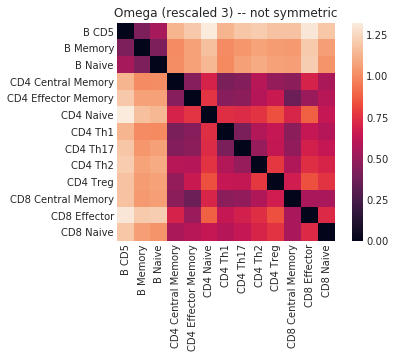

In [98]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
# make into distance matrix as suggested in links above
rescaled = np.sqrt(2*(1-mean_matrix))
#rescaled /= 2 # my own
g = sns.heatmap(rescaled, square=True,
                xticklabels=subset_names_cleaner,
                yticklabels=subset_names_cleaner
               )
plt.title('Omega (rescaled 3) -- not symmetric')

In [99]:
pdist = scipy.spatial.distance.squareform(rescaled)
pdist

array([ 0.42426171,  0.54448508,  1.13501806,  1.20534808,  1.32461693,
        1.13830752,  1.19077622,  1.21449413,  1.18277132,  1.18231468,
        1.3041963 ,  1.19963161,  0.42159459,  1.00490895,  1.07127494,
        1.17285549,  1.00576737,  1.03501498,  1.07752401,  1.05727953,
        1.04818033,  1.21036441,  1.0613661 ,  1.01354428,  1.07407169,
        1.14456192,  1.00236919,  1.06963358,  1.1061094 ,  1.07485069,
        1.06328641,  1.2187551 ,  1.03334602,  0.4463698 ,  0.69929536,
        0.41630518,  0.44223975,  0.59580869,  0.49394332,  0.46775421,
        0.70005714,  0.56308969,  0.76284992,  0.45387664,  0.46872593,
        0.59482098,  0.65209815,  0.36506986,  0.50880252,  0.59765877,
        0.74352539,  0.73074072,  0.75615607,  0.84146301,  0.71021687,
        0.88293941,  0.63743235,  0.40904767,  0.58099398,  0.64096334,
        0.46772214,  0.64138444,  0.59315091,  0.50107085,  0.63587735,
        0.48233391,  0.69146366,  0.63790595,  0.77609535,  0.57

In [100]:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
links = linkage(pdist, 'ward') # row i is which clusters were merged in i-th iteration, their distance, and their sample count
print(links)
from scipy.cluster.hierarchy import cophenet
c, _ = cophenet(links, pdist)
c # want close to 1: means actual pairwise distances well preserved by hierarchical clustering

[[  4.          10.           0.36506986   2.        ]
 [  6.           7.           0.40904767   2.        ]
 [  1.           2.           0.42159459   2.        ]
 [  3.          14.           0.43606269   3.        ]
 [  0.          15.           0.5083247    3.        ]
 [ 13.          16.           0.54323966   5.        ]
 [  5.          12.           0.63743235   2.        ]
 [  8.          18.           0.64168996   6.        ]
 [ 11.          20.           0.73590159   7.        ]
 [  9.          21.           0.77150428   8.        ]
 [ 19.          22.           0.90560985  10.        ]
 [ 17.          23.           2.16214296  13.        ]]


0.94725927239654306

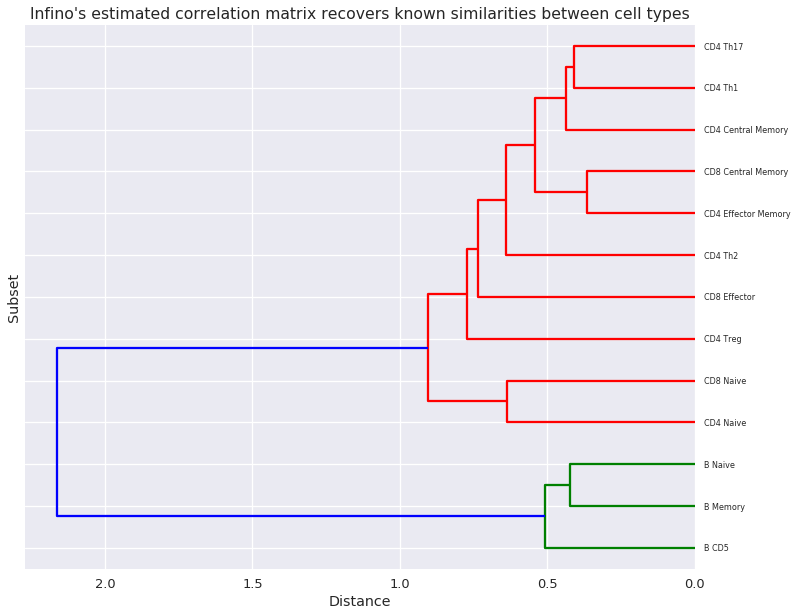

In [101]:

# plt.figure(figsize=(25, 10))
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     links,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
#     labels=colnames_filtered
# )

with sns.plotting_context('talk'):
    f = plt.figure(figsize=(12, 10))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    #plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    plt.title("Infino's estimated correlation matrix recovers known similarities between cell types")
    savefig(f, PLOT_DIR+'dendrogram.png', dpi=300)
    savefig(f, PLOT_DIR+'dendrogram.pdf', dpi=300)


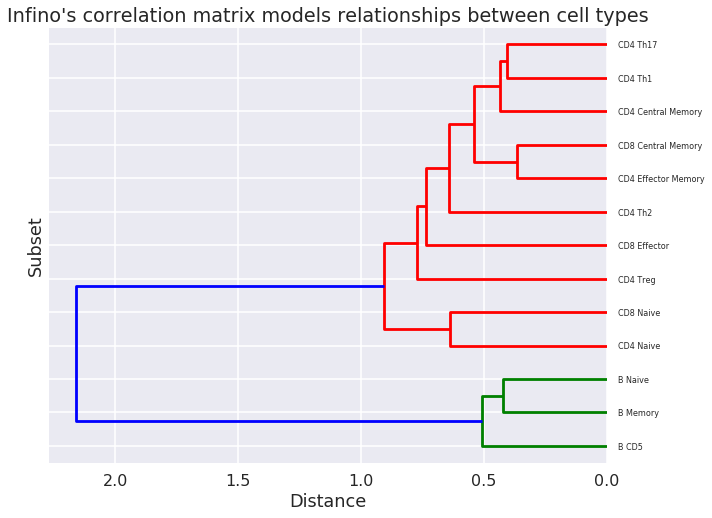

In [102]:
# portrait version


# plt.figure(figsize=(25, 10))
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     links,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
#     labels=colnames_filtered
# )

with sns.plotting_context('poster'):
    f = plt.figure(figsize=(10, 8))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    #plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    plt.title("Infino's correlation matrix models relationships between cell types")


Flip from Distance to Similarity:

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
<class 'float'>


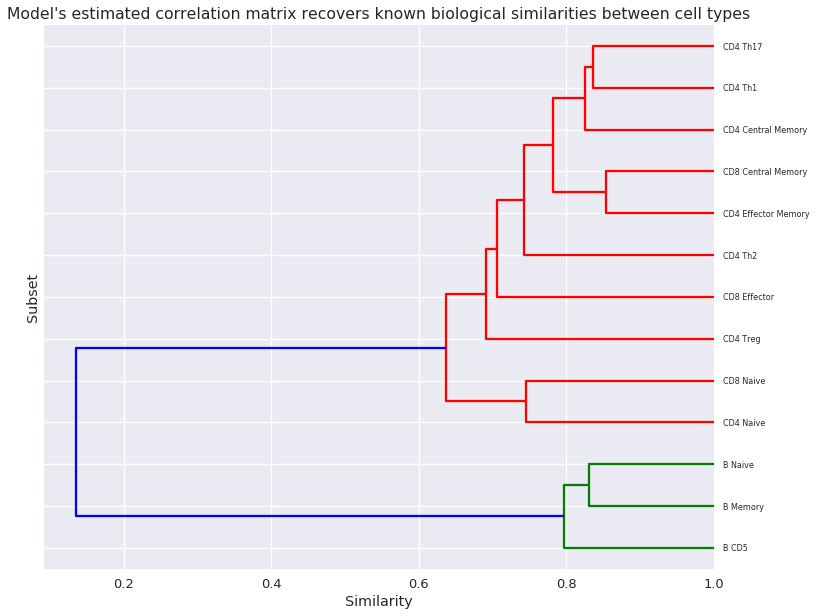

In [103]:
# similarity version

with sns.plotting_context('talk'):
    f = plt.figure(figsize=(12, 10))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    #plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    
    #plt.gca().invert_xaxis()
    ax = plt.gca()
#     lbls = plt.gca().get_xticklabels()
#     labels = [t.get_text() for t in plt.gca().get_xticklabels()]
    #labelsrev = list(reversed(labels))
    #ax.set_xticklabels(labelsrev)
    labels = ax.get_xticks().tolist()
    print(labels)
    print(type(labels[0]))
    
    # normalize
    labels_normed = [c / labels[-1] for c in labels]
    
    labelsrev = list(reversed(labels_normed))
    ax.set_xticklabels(labelsrev)
    
    plt.xlabel('Similarity')



Not sure if this is as interpretable. Distance between two items is easy. But how do you subtract similarities?

# Cibersort's diagnostics

In [104]:
print('Cibersort Diagnostics for hyper (inserted in google doc):')
for key,row in example_result[['RMSE', 'P-value']].iterrows():
    print("mixture %d" % (key+1))
    print("{{{mix%d_rmse:%0.2f}}}" % (key+1, row['RMSE']))
    print("{{{mix%d_pval:%0.1f}}}" % (key+1, row['P-value']))
example_result[['RMSE', 'P-value']].iloc[[6,1,9]]

Cibersort Diagnostics for hyper (inserted in google doc):
mixture 1
{{{mix1_rmse:0.28}}}
{{{mix1_pval:0.0}}}
mixture 2
{{{mix2_rmse:0.34}}}
{{{mix2_pval:0.0}}}
mixture 3
{{{mix3_rmse:0.30}}}
{{{mix3_pval:0.0}}}
mixture 4
{{{mix4_rmse:0.33}}}
{{{mix4_pval:0.0}}}
mixture 5
{{{mix5_rmse:0.27}}}
{{{mix5_pval:0.0}}}
mixture 6
{{{mix6_rmse:0.34}}}
{{{mix6_pval:0.0}}}
mixture 7
{{{mix7_rmse:0.45}}}
{{{mix7_pval:0.0}}}
mixture 8
{{{mix8_rmse:0.44}}}
{{{mix8_pval:0.0}}}
mixture 9
{{{mix9_rmse:0.41}}}
{{{mix9_pval:0.0}}}
mixture 10
{{{mix10_rmse:0.49}}}
{{{mix10_pval:0.0}}}


,RMSE,P-value
6,0.452792,0.0
1,0.339896,0.0
9,0.486806,0.0
